In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
# Conexion a drive y descompresión de los corpus
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
archivo = "/content/drive/MyDrive/COLAB - TFM/wikinews.300.es.txt_analisis_oraciones.csv"

In [42]:
raiz = "/content/drive/MyDrive/COLAB - TFM/"
archivos = [("wikinews.25.txt_analisis_oraciones.csv","wikinews.75.txt_analisis_oraciones.csv","wikinews.300.es.txt_analisis_oraciones.csv"),
            ("medline.25.txt_analisis_oraciones.csv","medline.75.txt_analisis_oraciones.csv","medline.1200.es.txt_analisis_oraciones.csv"),
            ("cord.50.txt_analisis_oraciones.csv","cord.150.txt_analisis_oraciones.csv")]

In [57]:
raiz = "/content/drive/MyDrive/COLAB - TFM/"
archivos = ["wikinews.25.txt_ultima_prueba_preprocessing.csv","wikinews.75.txt_ultima_prueba_preprocessing.csv","wikinews.300.es.txt_ultima_prueba_preprocessing.csv",
            "medline.25.txt_ultima_prueba_preprocessing.csv","medline.75.txt_ultima_prueba_preprocessing.csv","medline.1200.es.txt_ultima_prueba_preprocessing.csv",
            "cord.50.txt_ultima_prueba_preprocessing.csv","cord.150.txt_ultima_prueba_preprocessing.csv"]

In [61]:
for i, fichero in enumerate(archivos):
    archivo = raiz + fichero
    if i == 0:
      df = pd.read_csv(archivo, index_col=0)
      df["fichero"] = fichero.split(".")[1]
      df["archivo"] = fichero.split(".")[0]
    else:
      df_tmp = pd.read_csv(archivo, index_col=0)
      df_tmp["fichero"] = fichero.split(".")[1]
      df_tmp["archivo"] = fichero.split(".")[0]      
      df = pd.concat([df, df_tmp], axis=0)
    archivo = raiz + fichero.split(".")[0]

In [46]:
df[(df["archivo"] == "cord") & (df["fichero"] == 50)]["sum_freq_palabra"]

Series([], Name: sum_freq_palabra, dtype: int64)

In [47]:
df.loc[:,"palabra_poc_freq_cord"] = 0
df.loc[df["palabra_ratio"] < df[df["archivo"] == "cord"]["palabra_ratio"].quantile(0.33),"palabra_poc_freq_cord"] = 1

In [48]:
df.columns

Index(['Sentence #', 'Word', 'POS', 'Tag', 'longitud', 'longitud.1',
       'sum_freq_palabra', 'palabra_ratio', 'rank_freq_palabra',
       'sum_freq_pos', 'pos_ratio', 'rank_freq_pos', 'wv', 'dif_wv_33',
       'fichero', 'archivo', 'palabra_poc_freq_cord'],
      dtype='object')

In [54]:
df["archivo"].value_counts()

cord    4411
Name: archivo, dtype: int64

In [80]:
df[(df["archivo"] == "medline") & (df["fichero"] == "1200")]["palabra_ratio"].quantile(0.1)

6.328713372571356e-05

In [70]:
df[(df["archivo"] == "medline") & (df["fichero"] == "1200")]["palabra_ratio"].quantile(0.33)

0.0005062970698057

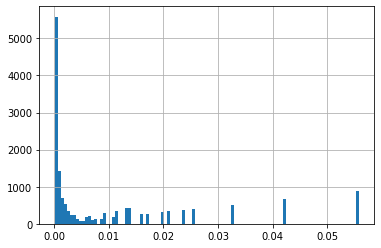

In [72]:
df[(df["archivo"] == "medline") & (df["fichero"] == "1200")]["palabra_ratio"].hist(bins=100)

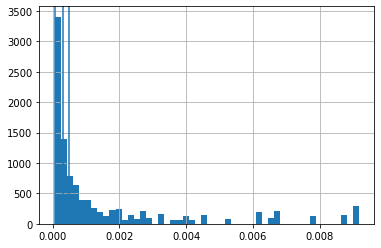

In [82]:
df[(df["archivo"] == "medline") & (df["fichero"] == "1200") & (df["palabra_ratio"] < 0.01)]["palabra_ratio"].hist(bins=50)
plt.axvline(df[(df["archivo"] == "medline") & (df["fichero"] == "1200")]["palabra_ratio"].quantile(0.33))
plt.axvline(df[(df["archivo"] == "medline") & (df["fichero"] == "1200")]["palabra_ratio"].quantile(0.25))
plt.axvline(df[(df["archivo"] == "medline") & (df["fichero"] == "1200")]["palabra_ratio"].quantile(0.1))


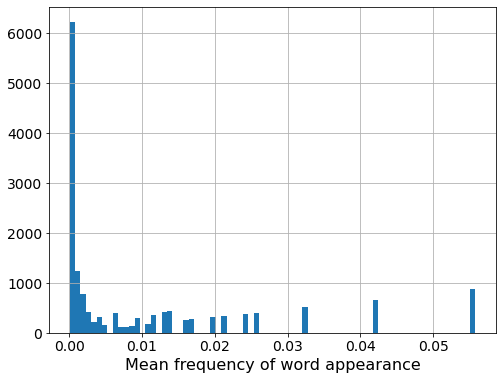

In [117]:
df[(df["archivo"] == "medline") & (df["fichero"] == "1200")]["palabra_ratio"].hist(bins=75, figsize=(8,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Mean frequency of word appearance", fontsize=16)
plt.show()

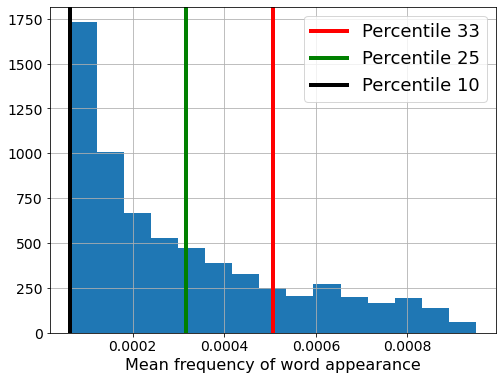

In [115]:
df[(df["archivo"] == "medline") & (df["fichero"] == "1200") & (df["palabra_ratio"] < 0.001)]["palabra_ratio"].hist(bins=15, figsize=(8,6))
plt.axvline(df[(df["archivo"] == "medline") & (df["fichero"] == "1200")]["palabra_ratio"].quantile(0.33), color="red", label="Percentile 33", linewidth=4)
plt.axvline(df[(df["archivo"] == "medline") & (df["fichero"] == "1200")]["palabra_ratio"].quantile(0.25), color="green", label="Percentile 25", linewidth=4)
plt.axvline(df[(df["archivo"] == "medline") & (df["fichero"] == "1200")]["palabra_ratio"].quantile(0.1), color="black", label="Percentile 10", linewidth=4)
plt.legend(prop={'size': 18})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Mean frequency of word appearance", fontsize=16)
plt.show()

In [120]:
df[(df["archivo"] == "medline") & (df["Sentence #"] == 1189)][["Sentence #", "Word", "POS", "Tag", "palabra_ratio"]].to_excel(raiz+"20220918_OracionPalabrasRaras.xlsx")

In [121]:
df[(df["archivo"] == "medline") & (df["Sentence #"] == 423)][["Sentence #", "Word", "POS", "Tag", "palabra_ratio"]].to_excel(raiz+"20220918_OracionSinPalabrasRaras.xlsx")

In [122]:
df[(df["archivo"] == "medline") & (df["Sentence #"] == 1189)].head()

,Sentence #,Word,POS,Tag,longitud,longitud.1,sum_freq_palabra,palabra_ratio,rank_freq_palabra,sum_freq_pos,pos_ratio,rank_freq_pos,wv,dif_wv_33,fichero,archivo
15719,1189,los,DET,O,21,21,12,0.025568,4,4,0.175115,568,[-0.21191406 0.10205078 0.03588867 0.142578...,-0.449197,1200,medline
15720,1189,procedimientos,NOUN,B-Concept,21,21,12,0.000253,4,4,0.282514,568,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,-0.449197,1200,medline
15721,1189,de,ADP,O,21,21,12,0.055819,4,4,0.137270,568,[-1.89453125e-01 1.81640625e-01 3.35937500e-...,-0.449197,1200,medline
15722,1189,tecnología,NOUN,B-Concept,21,21,12,0.000253,4,4,0.282514,568,[-3.90625000e-02 -1.06445312e-01 3.80859375e-...,-0.449197,1200,medline
15723,1189,de,ADP,O,21,21,12,0.055819,4,4,0.137270,568,[-1.89453125e-01 1.81640625e-01 3.35937500e-...,-0.449197,1200,medline


In [123]:
df[(df["archivo"] == "medline") & (df["Sentence #"] == 423)].head()

,Sentence #,Word,POS,Tag,longitud,longitud.1,sum_freq_palabra,palabra_ratio,rank_freq_palabra,sum_freq_pos,pos_ratio,rank_freq_pos,wv,dif_wv_33,fichero,archivo
5378,423,el,DET,O,14,14,1,0.032656,1103,3,0.175115,758,[-1.20239258e-02 2.04101562e-01 2.29492188e-...,-0.028932,1200,medline
5379,423,tratamiento,NOUN,B-Action,14,14,1,0.003228,1103,3,0.282514,758,[-0.0402832 0.03955078 0.00634766 -0.004058...,-0.028932,1200,medline
5380,423,para,ADP,O,14,14,1,0.009177,1103,3,0.137270,758,[ 0.00460815 -0.06591797 0.16796875 0.104003...,-0.028932,1200,medline
5381,423,algunos,DET,O,14,14,1,0.001772,1103,3,0.175115,758,[-5.37109375e-02 3.34472656e-02 8.05664062e-...,-0.028932,1200,medline
5382,423,tipos,NOUN,B-Predicate,14,14,1,0.001076,1103,3,0.282514,758,[-2.08740234e-02 -1.23291016e-02 3.06396484e-...,-0.028932,1200,medline


In [97]:
df[(df["archivo"] == "medline") & (df["fichero"] == "1200")].groupby(["archivo","fichero", "rank_freq_palabra","Sentence #" ]).agg({"palabra_ratio":np.mean, "sum_freq_palabra":np.mean }).tail(50)

palabra_ratio  sum_freq_palabra
archivo fichero rank_freq_palabra Sentence #                                 
medline 1200    1098              397              0.022323               1.0
                1099              155              0.012130               1.0
                1100              969              0.007035               1.0
                1101              812              0.012088               1.0
                1102              948              0.010052               1.0
                1103              423              0.012865               1.0
                1104              111              0.010674               1.0
                1105              151              0.012689               1.0
                1106              131              0.011448               1.0
                1107              72               0.012809               1.0
                1108              916              0.008382               1.0
                1109              912              0.010106               1.0
                1110              513              0.005759               1.0
                1111              895              0.010506               1.0
                1112              482              0.011117               1.0
                1113              876              0.012460               1.0
                1114              1027             0.011683               1.0
                1115              1036             0.010463               1.0
                1116              167              0.012847               1.0
                1117              1045             0.017898               1.0
                1118              1122             0.012752               1.0
                1119              1120             0.006218               1.0
                1120              1119             0.012088               1.0
                1121              18               0.011491               1.0
                1122              1186             0.012323               1.0
                1123              624              0.004228               1.0
                1124              1102             0.020386               1.0
                1125              620              0.010090               1.0
                1126              619              0.019481               1.0
                1127              617              0.006898               1.0
                1128              613              0.018220               1.0
                1129              115              0.012061               1.0
                1130              174              0.012252               1.0
                1131              1082             0.012727               1.0
                1132              26               0.005237               1.0
                1133              607              0.011793               1.0
                1134              173              0.019581               1.0
                1135              753              0.013487               1.0
                1136              106              0.011194               1.0
                1137              191              0.008372               1.0
                1138              344              0.012003               0.0
                1139              1180             0.012050               0.0
                1140              178              0.013554               0.0
                1141              330              0.013760               0.0
                1142              1023             0.012956               0.0
                1143              159              0.008132               0.0
                1144              158              0.004215               0.0
                1145              393              0.011961               0.0
                1146              843              0.008023               0.0
                1147              107              0.007805         

In [64]:
df.groupby(["archivo","fichero", "rank_freq_palabra","Sentence #" ]).agg({"palabra_ratio":np.mean, "sum_freq_palabra":np.mean })

palabra_ratio  sum_freq_palabra
archivo  fichero rank_freq_palabra Sentence #                                 
cord     150     0                 13               0.004056              15.0
                 1                 99               0.009209              11.0
                 2                 28               0.008588              11.0
                 3                 29               0.015647              11.0
                 4                 104              0.010423              11.0
...                                                      ...               ...
wikinews 75      67                4                0.010250               3.0
                 68                36               0.022091               2.0
                 69                67               0.024505               2.0
                 70                10               0.017054               2.0
                 71                0                0.017754               2.0

[1815 rows x 2 columns]

In [35]:
raiz = "/content/drive/MyDrive/COLAB - TFM/"
archivos = [("wikinews.25.txt_analisis_oraciones.csv","wikinews.75.txt_analisis_oraciones.csv","wikinews.300.es.txt_analisis_oraciones.csv"),
            ("medline.25.txt_analisis_oraciones.csv","medline.75.txt_analisis_oraciones.csv","medline.1200.es.txt_analisis_oraciones.csv"),
            ("cord.50.txt_analisis_oraciones.csv","cord.150.txt_analisis_oraciones.csv")]

In [36]:
for ficheros in archivos:
  for i, fichero in enumerate(ficheros):
    archivo = raiz + fichero
    if i == 0:
      df = pd.read_csv(archivo, index_col=0)
      df["fichero"] = fichero.split(".")[1]
      df["archivo"] = fichero.split(".")[0]
    else:
      df_tmp = pd.read_csv(archivo, index_col=0)
      df_tmp["fichero"] = fichero.split(".")[1]
      df_tmp["archivo"] = fichero.split(".")[0]      
      df = pd.concat([df, df_tmp], axis=0)
  archivo = raiz + fichero.split(".")[0]

In [37]:
df.head()

,Sentence #,longitud,sum_freq_palabra,rank_freq_palabra,sum_freq_pos,rank_freq_pos,dif_wv_33,fichero,archivo
0,0,29,0,0,12,4,0.074885,50,cord
29,1,23,0,24,9,15,0.009610,50,cord
52,2,21,0,26,7,23,-0.091115,50,cord
73,3,17,0,27,6,31,0.042719,50,cord
90,4,19,0,28,5,33,-0.088507,50,cord


0 longitud


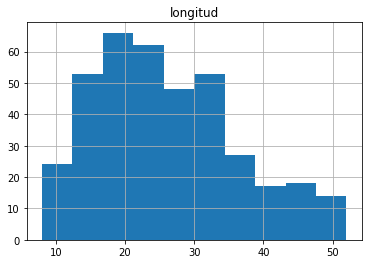

1 sum_freq_palabra


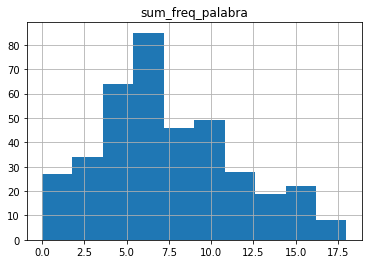

2 sum_freq_pos


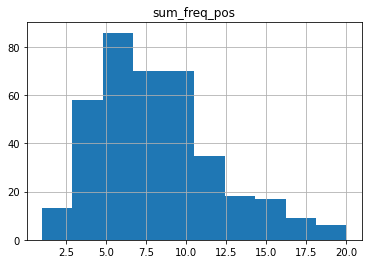

3 dif_wv_33


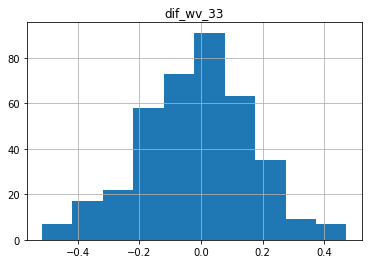

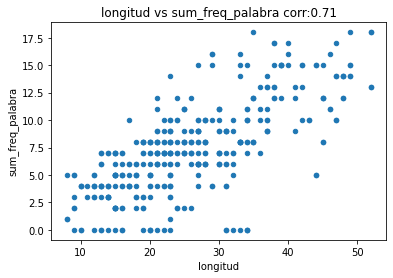

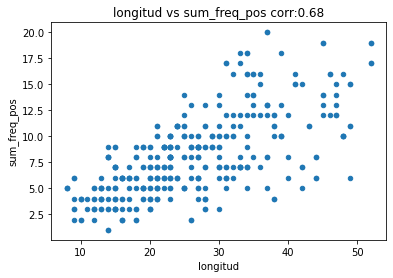

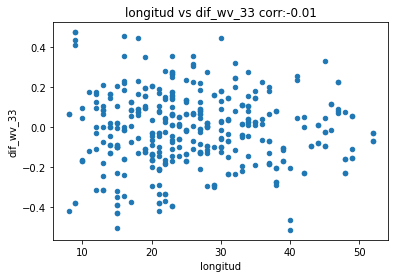

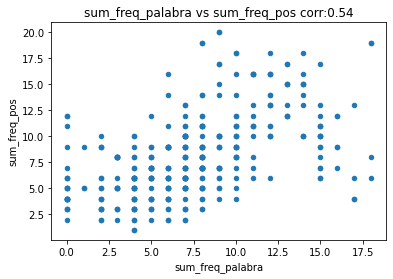

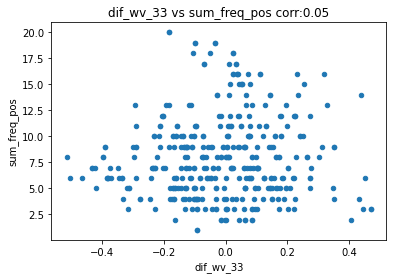

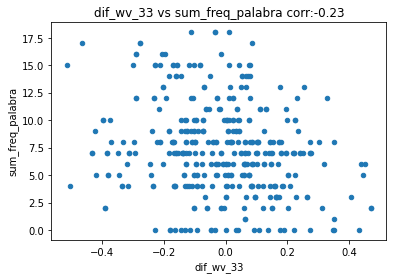

0 longitud


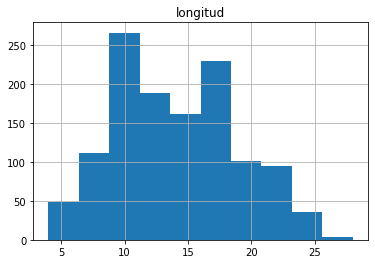

1 sum_freq_palabra


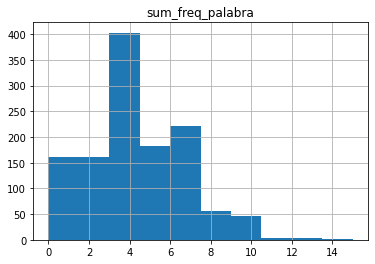

2 sum_freq_pos


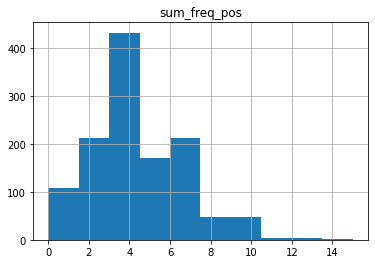

3 dif_wv_33


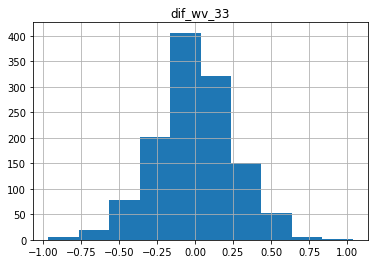

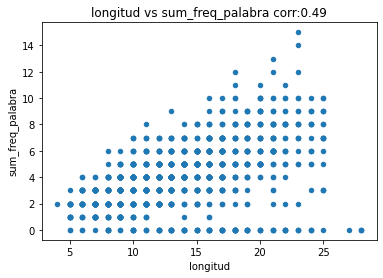

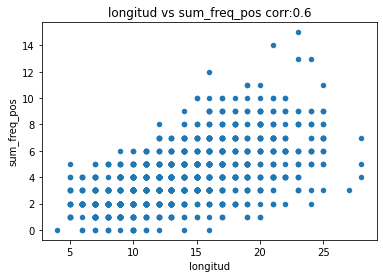

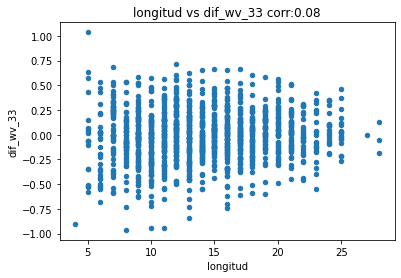

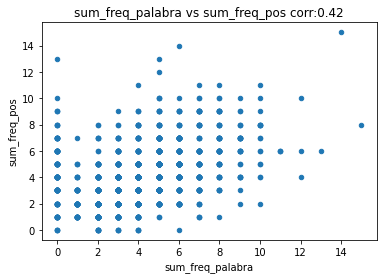

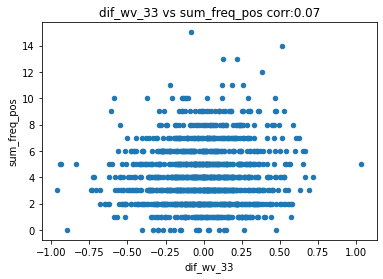

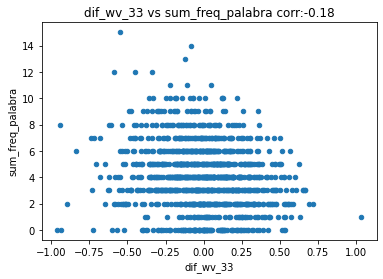

0 longitud


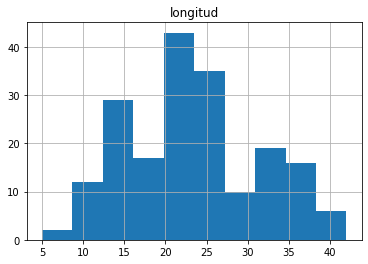

1 sum_freq_palabra


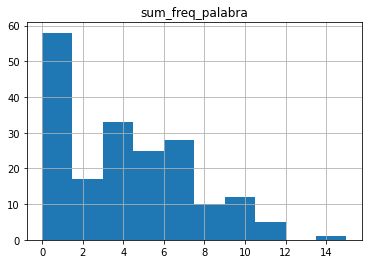

2 sum_freq_pos


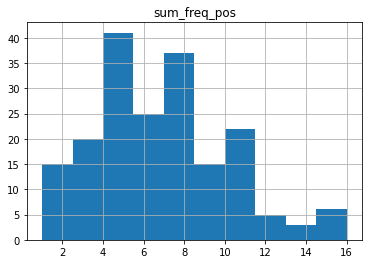

3 dif_wv_33


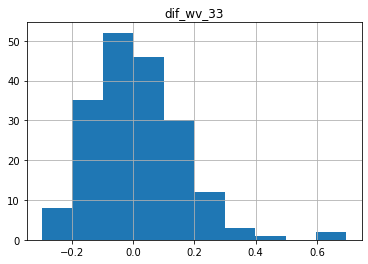

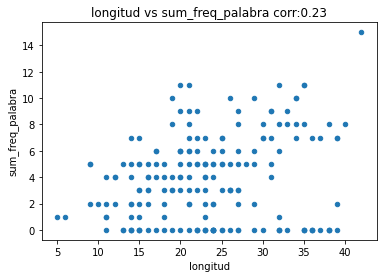

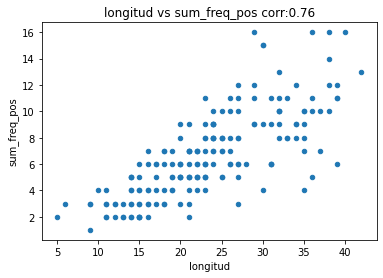

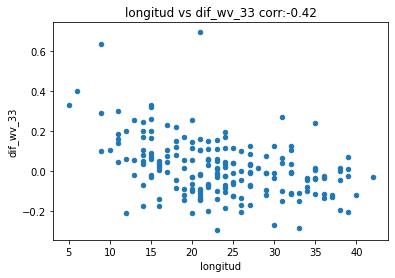

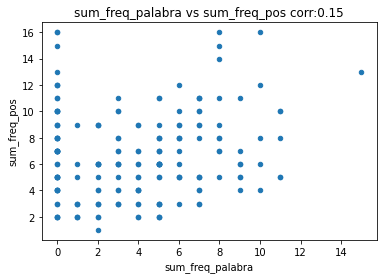

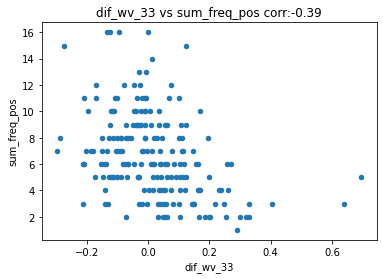

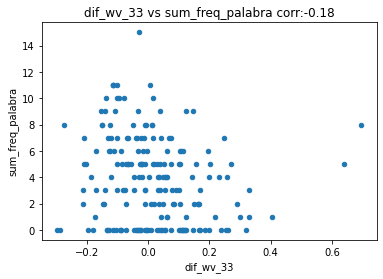

In [ ]:
for ficheros in archivos:
  for i, fichero in enumerate(ficheros):
    archivo = raiz + fichero
    if i == 0:
      df = pd.read_csv(archivo, index_col=0)
      df["fichero"] = fichero.split(".")[1]
    else:
      df_tmp = pd.read_csv(archivo, index_col=0)
      df_tmp["fichero"] = fichero.split(".")[1]      
      df = pd.concat([df, df_tmp], axis=0)
  archivo = raiz + fichero.split(".")[0]
  for i, col in enumerate(['longitud', 'sum_freq_palabra','sum_freq_pos', 'dif_wv_33']):
    print(i, col)
    df.hist(column=col)
    plt.title(col)
    plt.savefig(archivo+"_hist_"+col+".png")
    plt.show()

  df.plot.scatter("longitud","sum_freq_palabra", title="longitud vs sum_freq_palabra corr:"+str(round(df[["longitud","sum_freq_palabra"]].corr().iloc[0,1],2)))
  plt.savefig(archivo+"_corr_longitud_sum_freq_palabra.png")
  plt.show()
  df.plot.scatter("longitud","sum_freq_pos", title="longitud vs sum_freq_pos corr:"+str(round(df[["longitud","sum_freq_pos"]].corr().iloc[0,1],2)))
  plt.savefig(archivo+"_corr_longitud_sum_freq_pos.png")
  plt.show()
  df.plot.scatter("longitud","dif_wv_33", title="longitud vs dif_wv_33 corr:"+str(round(df[["longitud","dif_wv_33"]].corr().iloc[0,1],2)))
  plt.savefig(archivo+"_corr_longitud_dif_wv_33.png")
  plt.show()
  df.plot.scatter("sum_freq_palabra","sum_freq_pos", title="sum_freq_palabra vs sum_freq_pos corr:"+str(round(df[["sum_freq_palabra","sum_freq_pos"]].corr().iloc[0,1],2)))
  plt.savefig(archivo+"_corr_sum_freq_palabra_sum_freq_pos.png")
  plt.show()
  df.plot.scatter("dif_wv_33","sum_freq_pos", title="dif_wv_33 vs sum_freq_pos corr:"+str(round(df[["dif_wv_33","sum_freq_pos"]].corr().iloc[0,1],2)))
  plt.savefig(archivo+"_corr_dif_wv_33_sum_freq_pos.png")
  plt.show()
  df.plot.scatter("dif_wv_33","sum_freq_palabra", title="dif_wv_33 vs sum_freq_palabra corr:"+str(round(df[["dif_wv_33","sum_freq_palabra"]].corr().iloc[0,1],2)))
  plt.savefig(archivo+"_corr_dif_wv_33_sum_freq_palabra.png")
  plt.show()
  df.to_csv(archivo+"_resumen_oraciones.csv")


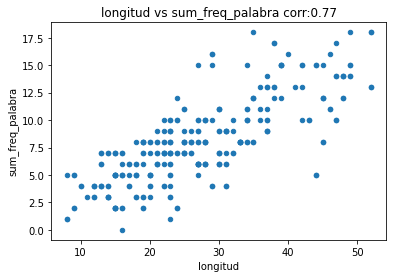

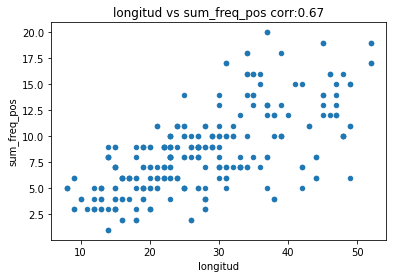

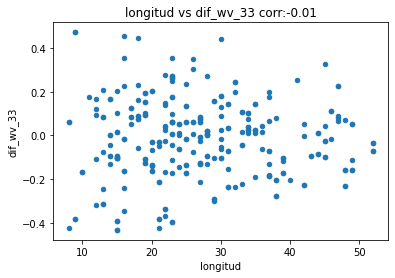

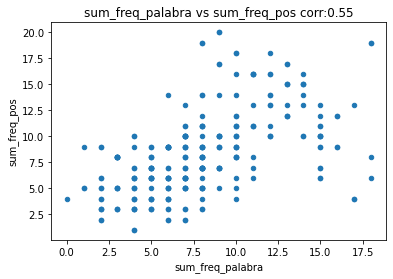

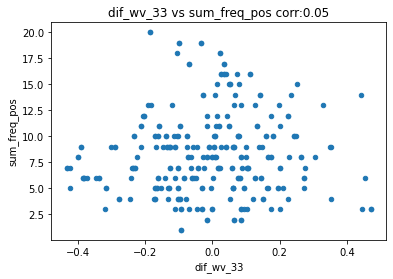

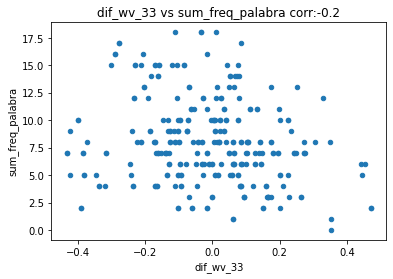